<a href="https://colab.research.google.com/github/andrewc998/pandas_statiscal_methods_and_visualization/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](https://github.com/learn-co-curriculum/dsc-pandas-eda-lab/blob/master/images/neighborhood_aerial.jpg?raw=1)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average
       5	 Average
       4	 Below Average
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [43]:
df = pd.read_csv("/content/AmesHousing.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual     29

In [45]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 2930

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 81

Inspect the contents of the dataframe:

In [46]:
# Run this cell without changes
df['TotRms AbvGrd']

,TotRms AbvGrd
Order,
1,7
2,5
3,6
4,8
5,6
...,...
2926,6
2927,5
2928,6


In [47]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual     29

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

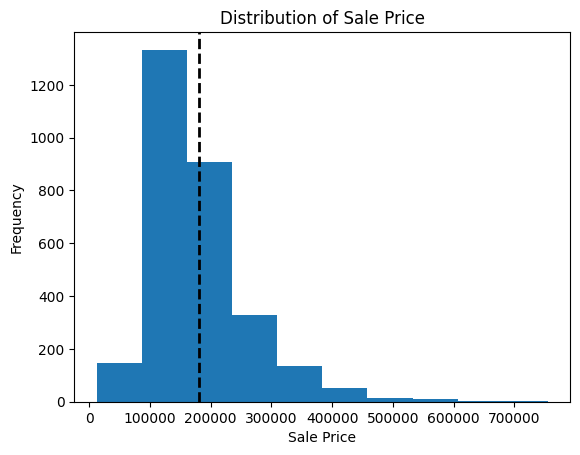

In [48]:
# Your code here

plt.hist(df['SalePrice'])


plt.axvline(df['SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2)


plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')


plt.show()

Now, print out the mean, median, and standard deviation:

In [49]:
# Your code here
df['SalePrice'].describe()

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In the cell below, interpret the above information.

In [50]:
# Replace None with appropriate text
#median is 16000

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

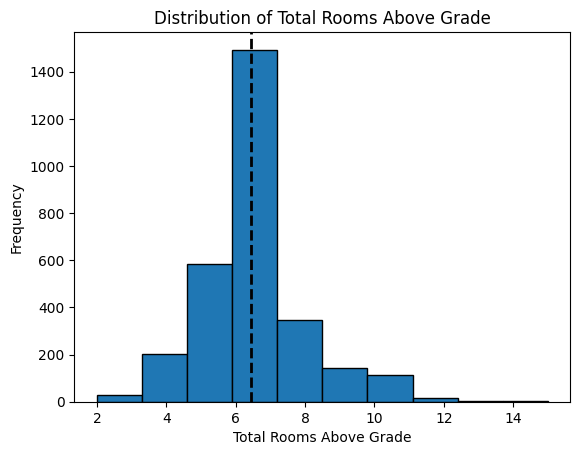

In [51]:
# Your code here

# Create the histogram
plt.hist(df['TotRms AbvGrd'], edgecolor = 'black')

# Add a vertical line for the mean
plt.axvline(df['TotRms AbvGrd'].mean(), color='black', linestyle='dashed', linewidth=2)

# Customize the plot
plt.title('Distribution of Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [52]:
df['TotRms AbvGrd'].describe()

,TotRms AbvGrd
count,2930.000000
mean,6.443003
std,1.572964
min,2.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,15.000000


In the cell below, interpret the above information.

In [53]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [54]:
df['Overall Cond']

,Overall Cond
Order,
1,5
2,6
3,6
4,5
5,5
...,...
2926,6
2927,5
2928,5


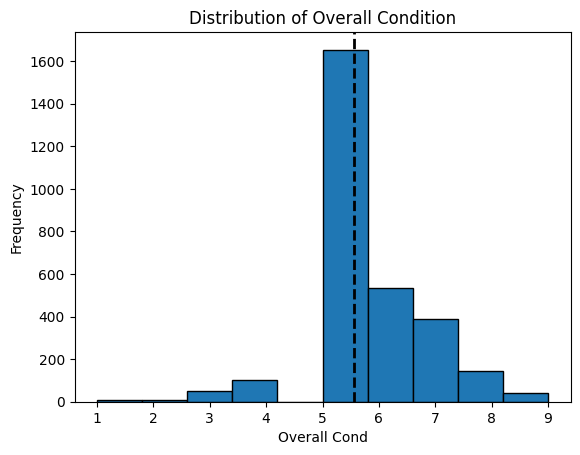

In [55]:
# Create the histogram
plt.hist(df['Overall Cond'], edgecolor = 'black')

# Add a vertical line for the mean
plt.axvline(df['Overall Cond'].mean(), color='black', linestyle='dashed', linewidth=2)

# Customize the plot
plt.title('Distribution of Overall Condition')
plt.xlabel('Overall Cond')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [56]:
# Your code here
mean = df['Overall Cond'].mean()
median = df['Overall Cond'].median()
std = df['Overall Cond'].std()

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)


Mean: 5.563139931740614
Median: 5.0
Standard Deviation: 1.1115365600303484


In the cell below, interpret the above information.

In [57]:
# Replace None with appropriate text
"""
Houses in the dataset have a slightly above-average overall condition, clustered around a mean of 5.56 with moderate variability. This suggests most homes are in decent condition, with further analysis needed to explore the impact on sale price.
"""

'\nHouses in the dataset have a slightly above-average overall condition, clustered around a mean of 5.56 with moderate variability. This suggests most homes are in decent condition, with further analysis needed to explore the impact on sale price.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [58]:
# Replace None with appropriate code
below_average_condition = df[df['Overall Cond'] <5]
average_condition = df[df['Overall Cond'] ==5]
above_average_condition = df[df['Overall Cond']>5]

The following code checks that you created the subsets correctly:

In [59]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 81
assert average_condition.shape[1] == 81
assert above_average_condition.shape[1] == 81



The following code will produce a plot of the distributions of sale price for each of these subsets:

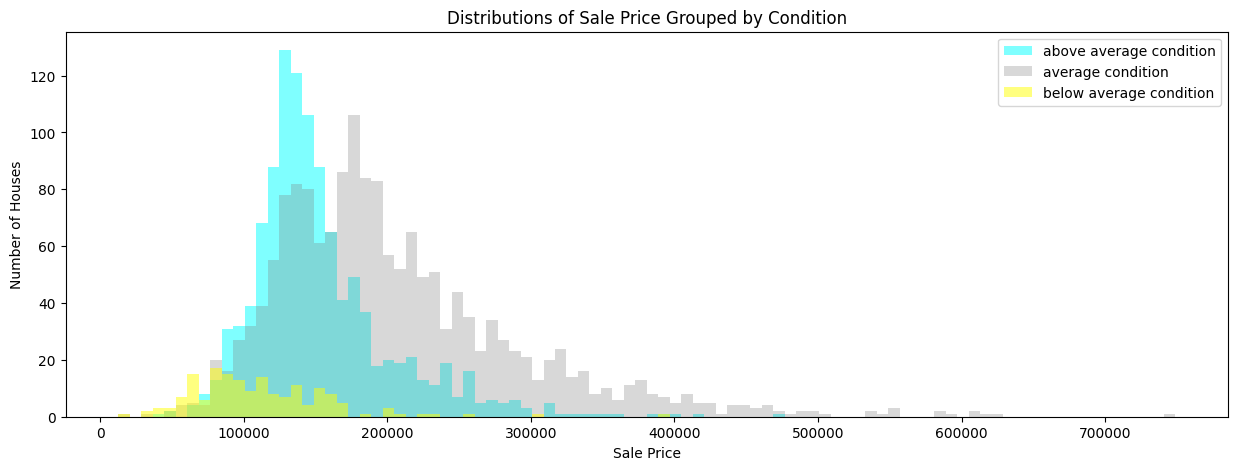

In [60]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [61]:
# Replace None with appropriate text
"""
Above Average Condition: Houses in above-average condition tend to have higher sale prices compared to those in average or below-average condition. The distribution is skewed towards higher prices, with a longer tail extending into higher values.

Average Condition: Houses in average condition show a more centered distribution with a peak around the median sale price. There is less variability in sale prices compared to the above-average condition group.

Below Average Condition: Houses in below-average condition generally have lower sale prices, with the distribution concentrated towards the lower end. There are fewer houses in this category compared to the others.

Relationship between Overall Condition and Sale Price:

There is a positive relationship between overall condition and sale price. Houses in better condition tend to command higher prices.
This relationship is not perfectly linear. Although above-average condition homes have higher average prices, there's still significant variation within each category.
Surprising Aspects:

Overlap: While there's a general trend, the distributions of sale prices for different overall conditions show some overlap. This indicates that other factors besides overall condition also influence sale price.
Below-Average Condition: The sale prices for below-average condition homes don't appear as dramatically lower as one might initially expect. This could indicate other factors, such as location or specific features, that influence their market value.
"""

"\nAbove Average Condition: Houses in above-average condition tend to have higher sale prices compared to those in average or below-average condition. The distribution is skewed towards higher prices, with a longer tail extending into higher values.\n\nAverage Condition: Houses in average condition show a more centered distribution with a peak around the median sale price. There is less variability in sale prices compared to the above-average condition group.\n\nBelow Average Condition: Houses in below-average condition generally have lower sale prices, with the distribution concentrated towards the lower end. There are fewer houses in this category compared to the others.\n\nRelationship between Overall Condition and Sale Price:\n\nThere is a positive relationship between overall condition and sale price. Houses in better condition tend to command higher prices.\nThis relationship is not perfectly linear. Although above-average condition homes have higher average prices, there's still

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [63]:
# Calculate correlations only for numeric features
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlations = numeric_df.corr()['SalePrice']

# Exclude SalePrice itself (correlation of 1)
correlations = correlations[correlations.index != 'SalePrice']

# Find the column with the highest positive correlation
most_positively_correlated_column = correlations.idxmax()
most_positive_correlation = correlations.max()

# Print the results
print(f"Most positively correlated column: {most_positively_correlated_column}")
print(f"Pearson correlation: {most_positive_correlation}")

Most positively correlated column: Overall Qual
Pearson correlation: 0.7992617947690243


Now, find the ***most negatively correlated*** column:

In [66]:
# Your code here
import pandas as pd

# Calculate correlations with SalePrice for numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['SalePrice']

# Exclude SalePrice itself (correlation of 1)
correlations = correlations[correlations.index != 'SalePrice']

# Find the column with the highest negative correlation (minimum value)
most_negatively_correlated_column = correlations.idxmin()
most_negative_correlation = correlations.min()

# Print the results
print(f"Most negatively correlated column: {most_negatively_correlated_column}")
print(f"Pearson correlation: {most_negative_correlation}")

Most negatively correlated column: PID
Pearson correlation: -0.24652121286673673


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

Text(0, 0.5, 'Sale Price')

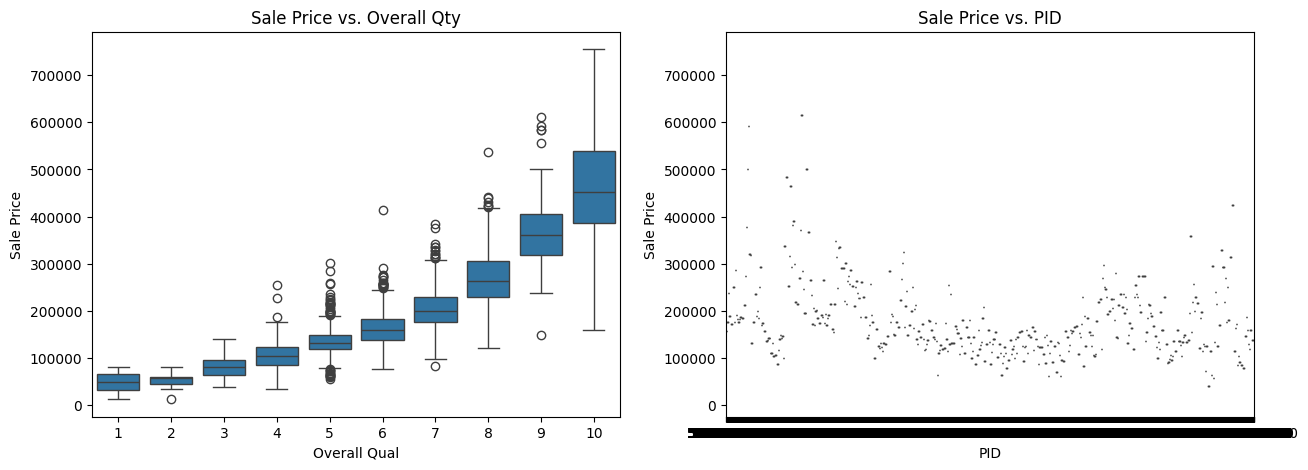

In [68]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positively_correlated_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negatively_correlated_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Sale Price vs. Overall Qty")
ax1.set_xlabel(most_positively_correlated_column)
ax1.set_ylabel("Sale Price")

ax2.set_title(f"Sale Price vs. PID")
ax2.set_xlabel(most_negatively_correlated_column)
ax2.set_ylabel("Sale Price")

Interpret the results below. Consult `data/data_description.txt` as needed.

In [70]:
# Replace None with appropriate text
"""
None
Box Plot 1: Sale Price vs. Overall Qual

Overall Qual (Overall Quality): This feature appears to have a strong positive correlation with SalePrice. As the overall quality rating increases (from 1 to 10), the median and overall distribution of SalePrice also tend to increase.
Higher Quality, Higher Price: Homes with higher overall quality ratings generally command higher sale prices.
Outliers: There are some outliers, especially at the higher quality ratings (8, 9, 10), indicating some houses with those ratings sold for exceptionally high prices.

Box Plot 2: Sale Price vs. PID

PID (Parcel Identification Number): This is typically a unique identifier assigned to each property and should not inherently correlate with sale price. The correlation might be spurious or due to the underlying data collection/sampling process.
No Clear Trend: The box plot does not show a clear or consistent relationship between PID and SalePrice. The median and distribution of sale prices are relatively similar across different PID ranges, which is expected for a unique identifier.
Caution: It's important to avoid drawing conclusions about SalePrice based on the PID feature, as the relationship is likely not meaningful or causal. Focus on other features with more clear and justifiable connections to sale price.
"""

"\nNone\nBox Plot 1: Sale Price vs. Overall Qual\n\nOverall Qual (Overall Quality): This feature appears to have a strong positive correlation with SalePrice. As the overall quality rating increases (from 1 to 10), the median and overall distribution of SalePrice also tend to increase.\nHigher Quality, Higher Price: Homes with higher overall quality ratings generally command higher sale prices.\nOutliers: There are some outliers, especially at the higher quality ratings (8, 9, 10), indicating some houses with those ratings sold for exceptionally high prices.\n\nBox Plot 2: Sale Price vs. PID\n\nPID (Parcel Identification Number): This is typically a unique identifier assigned to each property and should not inherently correlate with sale price. The correlation might be spurious or due to the underlying data collection/sampling process.\nNo Clear Trend: The box plot does not show a clear or consistent relationship between PID and SalePrice. The median and distribution of sale prices are

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [72]:
df['Yr Sold'].info()

<class 'pandas.core.series.Series'>
Index: 2930 entries, 1 to 2930
Series name: Yr Sold
Non-Null Count  Dtype
--------------  -----
2930 non-null   int64
dtypes: int64(1)
memory usage: 45.8 KB


In [73]:
# Run this cell without changes
df["Yr Sold"].value_counts().sort_index()

,count
Yr Sold,
2006,625
2007,694
2008,622
2009,648
2010,341


Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

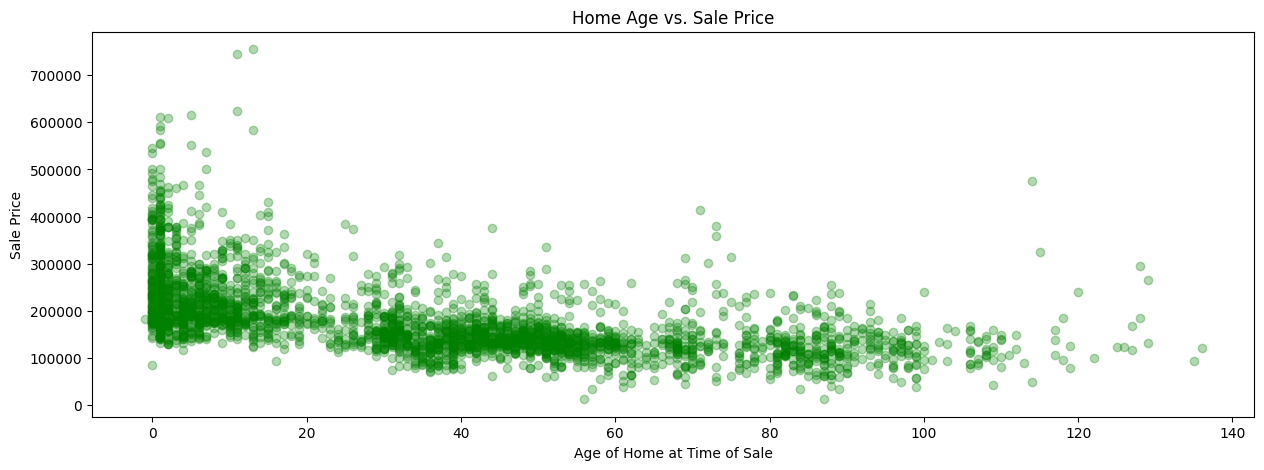

In [74]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["Yr Sold"] - df["Year Built"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [75]:
# Replace None with appropriate text
"""
Age as a Factor: While age is a factor in determining sale price, it's not the only or the most dominant one. Other factors like location, size, features, and overall condition likely have a more significant impact.

Weak Negative Trend: There's a weak negative correlation between age and sale price, indicating that newer homes tend to have slightly higher prices on average.

Variability: The considerable variability in sale prices for homes of similar ages highlights the complexity of the housing market and the influence of multiple factors on sale prices.
"""

"\nAge as a Factor: While age is a factor in determining sale price, it's not the only or the most dominant one. Other factors like location, size, features, and overall condition likely have a more significant impact.\n\nWeak Negative Trend: There's a weak negative correlation between age and sale price, indicating that newer homes tend to have slightly higher prices on average.\n\nVariability: The considerable variability in sale prices for homes of similar ages highlights the complexity of the housing market and the influence of multiple factors on sale prices.\n"

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.